# Plots for Workshop

In [1]:
import pickle
import matplotlib.pyplot as plt

In [3]:
with open("results/teachers_SSL_student_not.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)

accuracies_wo = d["accuracies_wo"]
accuracies_wo_std = d["accuracies_wo_std"]
accuracies_with = d["accuracies_with"]
accuracies_with_std = d["accuracies_with_std"]

num_samples_wo = d["num_answered_wo"]
num_samples_with = d["num_answered_with"]

{'accuracies_wo': {'noise_MNIST': [0.09550280448717947, 0.09714292868589743, 0.11121544471153848, 0.12315955528846152], 'dead_leaves': [0.20714393028846154, 0.24053485576923075, 0.2391200921474359, 0.262782952724359], 'FractalDB': [0.10561899038461538, 0.1176131810897436, 0.1256134815705128, 0.14038711939102563], 'stylegan': [0.2277393830128205, 0.280361077724359, 0.3086313100961538, 0.3687149439102564], 'Shaders21k': [0.25831330128205127, 0.2931941105769231, 0.3157051282051282, 0.34269831730769235], 'FMNIST': [0.23163311298076925, 0.2839418068910256, 0.2878856169871795, 0.3371644631410256], 'MNIST': [0.9447490985576922, 0.9415064102564102, 0.9378881209935898, 0.9471404246794872]}, 'accuracies_wo_std': {'noise_MNIST': [0.00307003848637703, 0.0083805507169235, 0.00581886589132998, 0.0010847002011864237], 'dead_leaves': [0.015175425439433376, 0.021476055885538584, 0.02884335517892004, 0.022474967557610036], 'FractalDB': [0.0034564813260176998, 0.004745306866082648, 0.009952236400409653, 

In [4]:
print(accuracies_with["noise_MNIST"][2])

0.677471454326923


In [5]:
for ds in accuracies_with.keys():
    print(ds + ": " + str(accuracies_with[ds][2]))
    


noise_MNIST: 0.677471454326923
dead_leaves: 0.7786583533653847
FractalDB: 0.761806390224359
stylegan: 0.7294921875
Shaders21k: 0.7307191506410255
FMNIST: 0.5711388221153847
MNIST: 0.9419195713141025


In [6]:
accuracies_wo_10 = {}
accuracies_with_10 = {}

for ds in accuracies_with.keys():
    accuracies_wo_10[ds] = accuracies_wo[ds][2]
    accuracies_with_10[ds] = accuracies_with[ds][2]


old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal"]

for i in range(len(old)):
    accuracies_with_10[new[i]] = accuracies_with_10.pop(old[i])
    accuracies_wo_10[new[i]] = accuracies_wo_10.pop(old[i])




accuracies_wo_10  = dict(sorted(accuracies_wo_10.items(), key=lambda item: item[1]))
accuracies_with_10= {key: accuracies_with_10[key] for key in accuracies_wo_10}





print(accuracies_wo_10)
print(accuracies_with_10)

{'Noise': 0.11121544471153848, 'Fractal': 0.1256134815705128, 'Leaves': 0.2391200921474359, 'FMNIST': 0.2878856169871795, 'StyleGAN': 0.3086313100961538, 'Shaders': 0.3157051282051282, 'MNIST': 0.9378881209935898}
{'Noise': 0.677471454326923, 'Fractal': 0.761806390224359, 'Leaves': 0.7786583533653847, 'FMNIST': 0.5711388221153847, 'StyleGAN': 0.7294921875, 'Shaders': 0.7307191506410255, 'MNIST': 0.9419195713141025}


In [7]:
accuracies_wo_5 = {}
accuracies_with_5 = {}

for ds in accuracies_with.keys():
    accuracies_wo_5[ds] = accuracies_wo[ds][0]
    accuracies_with_5[ds] = accuracies_with[ds][0]


old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal"]

for i in range(len(old)):
    accuracies_with_5[new[i]] = accuracies_with_5.pop(old[i])
    accuracies_wo_5[new[i]] = accuracies_wo_5.pop(old[i])




accuracies_wo_5  = dict(sorted(accuracies_wo_5.items(), key=lambda item: item[1]))
accuracies_with_5= {key: accuracies_with_5[key] for key in accuracies_wo_5}

print(accuracies_with_5)
print(accuracies_wo_5)



{'Noise': 0.4071138822115385, 'Fractal': 0.6244741586538461, 'Leaves': 0.5971804887820512, 'StyleGAN': 0.5777368790064102, 'FMNIST': 0.402431390224359, 'Shaders': 0.6672926682692308, 'MNIST': 0.9459259815705128}
{'Noise': 0.09550280448717947, 'Fractal': 0.10561899038461538, 'Leaves': 0.20714393028846154, 'StyleGAN': 0.2277393830128205, 'FMNIST': 0.23163311298076925, 'Shaders': 0.25831330128205127, 'MNIST': 0.9447490985576922}


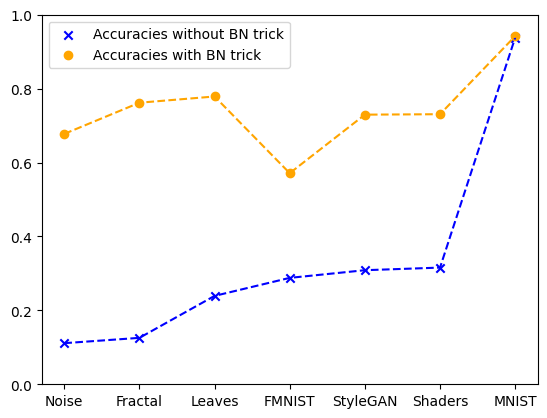

In [8]:
data = list(accuracies_wo_10.keys())
acc_wo = list(accuracies_wo_10.values())
acc_with = list(accuracies_with_10.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("OODness_influence_SSL_eps10.png")

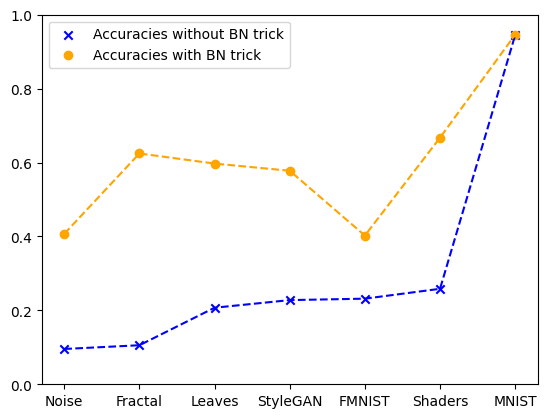

In [9]:
data = list(accuracies_wo_5.keys())
acc_wo = list(accuracies_wo_5.values())
acc_with = list(accuracies_with_5.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("OODness_influence_SSL_eps5.png")

In [11]:
columns = [5, 8, 10, 20]

# Print the table header
header = f"{'Epsilon':<10}" + "".join([f"{col:<10}" for col in columns])
print(header)
print("-" * len(header))

for key in accuracies_wo.keys():
    row = f"{key:<10}" + "".join([f"{round(accuracies_wo[key][i], 4)}" for i in range(len(columns))])
    print(row)



Epsilon   5         8         10        20        
--------------------------------------------------
noise_MNIST0.40710.58950.67750.7756
dead_leaves0.59720.7140.77870.8044
FractalDB 0.62450.7290.76180.7932
stylegan  0.57770.70360.72950.7852
Shaders21k0.66730.75570.73070.789
FMNIST    0.40240.50880.57110.6523
MNIST     0.94590.95220.94190.9485


In [9]:


# Define the keys (columns) and prepare the header row
keys = list(accuracies_wo.keys())  # Assuming all dicts have the same keys
header = header = f"{'Epsilon':<10}" + "".join([f"{col:<10}" for col in columns])
print(header)
print("-" * len(header))

# Iterate over each dictionary and print the values in the table
for row_name, row_dict in data.items():
    for key in keys:
        row_label = f"{key} + {row_name:<5}"
        row_values = "  ".join(f"{round(value, 4):<8}" for value in row_dict[key])
        print(f"{row_label}  {row_values}")

Epsilon   5         8         10        20        
--------------------------------------------------


AttributeError: 'list' object has no attribute 'items'

In [10]:
datasets = accuracies_wo.keys()
for dataset in datasets:
    for i in range(4):
        accuracies_with[dataset][i] = round(accuracies_with[dataset][i] * 100, 1)
        accuracies_wo[dataset][i] = round(accuracies_wo[dataset][i] * 100, 1)
        accuracies_with_std[dataset][i] = round(accuracies_with_std[dataset][i] * 100, 1)
        accuracies_wo_std[dataset][i] = round(accuracies_wo_std[dataset][i] * 100, 1)




In [11]:
epsilons = [5, 8, 10, 20]


# Start LaTeX table
latex_table = "\\begin{table}[]\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
# Add header row with epsilon values
latex_table += "Dataset & " + " & ".join([f"$\\varepsilon = ${e}" for e in epsilons]) + " \\\\ \\hline\n"

# Populate each row from the dictionaries
for dataset in datasets:
    # Create rows for accuracies without and with additional context
    row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
    row_with = " & ".join([f"{accuracies_with[dataset][i]}\% $\\pm$ {accuracies_with_std[dataset][i]}\%" for i in range(4)])
    
    
    row_with.replace("%", r"\%")
    
    # Add to LaTeX table
    latex_table += f"{dataset} + RS & {row_wo} \\\\ \\hline\n"
    latex_table += f"{dataset} + CS & {row_with} \\\\ \\hline\n"
    


# Close LaTeX table structure
latex_table += "\\end{tabular}\n\\end{table}"

latex_table.replace("%", r"\%")

# Print the resulting LaTeX table code
print(latex_table)

\begin{table}[]
\begin{tabular}{|c|c|c|c|c|}
\hline
Dataset & $\varepsilon = $5 & $\varepsilon = $8 & $\varepsilon = $10 & $\varepsilon = $20 \\ \hline
noise_MNIST + RS & 12.4\% $\pm$ 1.0\% & 11.6\% $\pm$ 0.5\% & 12.2\% $\pm$ 1.2\% & 11.3\% $\pm$ 0.8\% \\ \hline
noise_MNIST + CS & 90.0\% $\pm$ 0.3\% & 90.6\% $\pm$ 0.3\% & 91.0\% $\pm$ 0.1\% & 91.0\% $\pm$ 0.2\% \\ \hline
dead_leaves + RS & 36.6\% $\pm$ 1.0\% & 36.5\% $\pm$ 0.6\% & 37.8\% $\pm$ 0.5\% & 38.8\% $\pm$ 0.6\% \\ \hline
dead_leaves + CS & 89.7\% $\pm$ 0.4\% & 90.1\% $\pm$ 0.5\% & 90.4\% $\pm$ 0.3\% & 90.8\% $\pm$ 0.3\% \\ \hline
FractalDB + RS & 14.5\% $\pm$ 0.8\% & 15.1\% $\pm$ 0.8\% & 15.1\% $\pm$ 0.9\% & 16.4\% $\pm$ 0.5\% \\ \hline
FractalDB + CS & 89.3\% $\pm$ 0.1\% & 90.3\% $\pm$ 0.4\% & 90.6\% $\pm$ 0.3\% & 91.2\% $\pm$ 0.2\% \\ \hline
stylegan + RS & 46.6\% $\pm$ 1.5\% & 48.8\% $\pm$ 0.9\% & 48.2\% $\pm$ 1.4\% & 48.7\% $\pm$ 1.1\% \\ \hline
stylegan + CS & 89.0\% $\pm$ 0.3\% & 90.2\% $\pm$ 0.2\% & 90.6\% $\pm$ 0.4\% &

<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_3203440/4043840838.py:12: SyntaxWarning: invalid escape sequence '\%'
  row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
/tmp/ipykernel_3203440/4043840838.py:12: SyntaxWarning: invalid escape sequence '\%'
  row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
/tmp/ipykernel_3203440/4043840838.py:13: SyntaxWarning: invalid escape sequence '\%'
  row_with = " & ".join([f"{accuracies_with[dataset][i]}\% $\\pm$ {accuracies_with_std[dataset][i]}\%" 

In [12]:
for dataset in datasets:
    for i in range(4):
        accuracies_with[dataset][i] = round(accuracies_with[dataset][i] * 100, 1)



In [13]:
print(accuracies_with)

{'noise_MNIST': [9000.0, 9060.0, 9100.0, 9100.0], 'dead_leaves': [8970.0, 9010.0, 9040.0, 9080.0], 'FractalDB': [8930.0, 9030.0, 9060.0, 9120.0], 'stylegan': [8900.0, 9020.0, 9060.0, 9100.0], 'Shaders21k': [8860.0, 9000.0, 9010.0, 9070.0], 'FMNIST': [8630.0, 8820.0, 8950.0, 8990.0], 'MNIST': [9150.0, 9160.0, 9200.0, 9180.0]}


In [14]:
epsilons = [5, 8, 10, 20]


# Start LaTeX table
latex_table = "\\begin{table}[]\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
# Add header row with epsilon values
latex_table += "Dataset & " + " & ".join([f"$\\varepsilon = ${e}" for e in epsilons]) + " \\\\ \\hline\n"

# Populate each row from the dictionaries
for dataset in datasets:
    # Create rows for accuracies without and with additional context
    row_wo = " & ".join([f"{num_samples_wo[dataset][i]}" for i in range(4)])
    row_with = " & ".join([f"{num_samples_with[dataset][i]}" for i in range(4)])
    
    
    row_with.replace("%", r"\%")
    
    # Add to LaTeX table
    latex_table += f"{dataset} + RS & {row_wo} \\\\ \\hline\n"
    latex_table += f"{dataset} + CS & {row_with} \\\\ \\hline\n"
    


# Close LaTeX table structure
latex_table += "\\end{tabular}\n\\end{table}"

latex_table.replace("%", r"\%")

# Print the resulting LaTeX table code
print(latex_table)

\begin{table}[]
\begin{tabular}{|c|c|c|c|c|}
\hline
Dataset & $\varepsilon = $5 & $\varepsilon = $8 & $\varepsilon = $10 & $\varepsilon = $20 \\ \hline
noise_MNIST + RS & 2410.2 & 5365.2 & 7742.4 & 18048.4 \\ \hline
noise_MNIST + CS & 3270.0 & 7405.4 & 10709.4 & 25140.6 \\ \hline
dead_leaves + RS & 2425.4 & 5403.8 & 7816.6 & 23588.8 \\ \hline
dead_leaves + CS & 3304.4 & 7383.2 & 10785.0 & 32501.8 \\ \hline
FractalDB + RS & 4223.8 & 9473.4 & 13653.8 & 41401.6 \\ \hline
FractalDB + CS & 3258.8 & 7236.4 & 10547.2 & 31927.4 \\ \hline
stylegan + RS & 2620.4 & 5857.6 & 8441.8 & 25433.0 \\ \hline
stylegan + CS & 3313.6 & 7440.6 & 10712.2 & 32396.6 \\ \hline
Shaders21k + RS & 3166.6 & 7001.4 & 10145.6 & 30628.6 \\ \hline
Shaders21k + CS & 3561.2 & 8017.8 & 11623.6 & 35306.2 \\ \hline
FMNIST + RS & 3397.2 & 7527.6 & 10938.6 & 25337.8 \\ \hline
FMNIST + CS & 3323.8 & 7435.6 & 10771.0 & 25209.8 \\ \hline
MNIST + RS & 5395.2 & 5399.0 & 5415.6 & 5382.6 \\ \hline
MNIST + CS & 5394.8 & 5410.4 & 5427.

In [15]:
svhn_data_wo = {}
svhn_data_with = {}

svhn_data_wo ["noise"] = [0.12065544608648056, 0.11293345762634555, 0.12027985883050539, 0.10921678297755884]
svhn_data_wo["dead leaves"] = [0.2066599388797665, 0.25091794380587484, 0.3072296626984127, 0.4317578623882503]
svhn_data_wo["StyleGAN"] = [0.260495062488597, 0.38905138204707174, 0.46742439792008755, 0.577475740056559]
svhn_data_wo ["Shaders21k"] = [0.4066747628170042, 0.5480324074074074, 0.6228070550538223, 0.7199223738825031]
svhn_data_wo["SVHN pub"] = [0.8373486247947454, 0.864189216155811, 0.8695073036398467, 0.871163593550447]

svhn_data_with["noise"] = [0.12916068007662834, 0.13291441456850941, 0.14133626391169496, 0.22023524448093415]
svhn_data_with["dead leaves"] =  [0.2509250706987776, 0.37482610381317283, 0.47163496624703516, 0.6146880986590039]
svhn_data_with["StyleGAN"] = [0.288265713373472, 0.47034357325305604, 0.5242407008301405, 0.6549336628808611]
svhn_data_with ["Shaders21k"] = [0.45579402139208175, 0.6252216463692757, 0.6635914123791279, 0.761801421957672]
svhn_data_with["SVHN pub"] = [0.8403939461320927, 0.868902943121693, 0.8721998437785077, 0.8764339308520341]

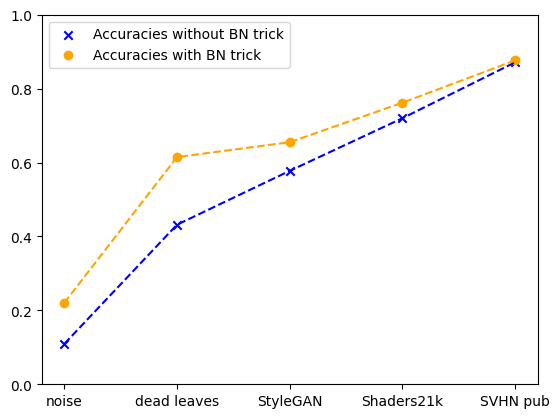

In [16]:
data = list(svhn_data_wo.keys())
acc_wo = [val[3] for val in svhn_data_wo.values()]
acc_with =  [val[3] for val in svhn_data_with.values()]



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("results/comparison_on_SVHN.png")
svhn_data_wo = {}
svhn_data_with = {}


In [17]:
fid_SVHN = {'SVHN': 0.1237,    'Shaders': 15.6990,'StyleGAN': 16.5535,'Leaves': 18.4737, 'noise':66.8186}
kid_SVHN = {'SVHN': 0.0091, 'Shaders': 0.2833, 'StyleGAN': 0.2470, 'Leaves': 0.3411,  'noise': 0.5601}

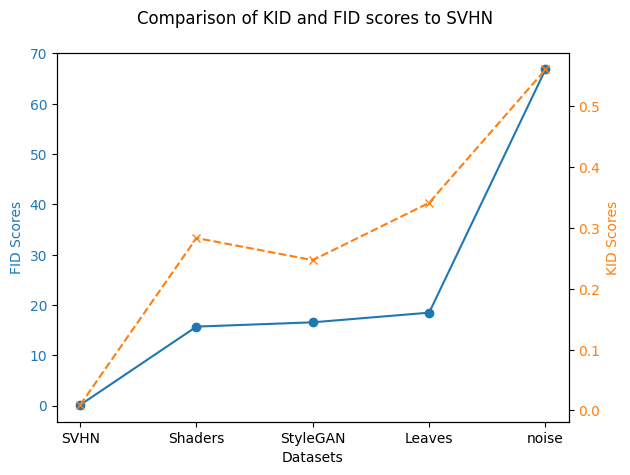

In [18]:
keys = list(fid_SVHN.keys()) 
fid_scores = list(fid_SVHN.values())
kid_scores = list(kid_SVHN.values())

fig, ax1 = plt.subplots()

ax1.set_xlabel('Datasets')
ax1.set_ylabel('FID Scores', color='tab:blue')
ax1.plot(keys, fid_scores, color='tab:blue', marker='o', label='Dict1')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Create a twin y-axis
ax2.set_ylabel('KID Scores', color='tab:orange')
ax2.plot(keys, kid_scores, color='tab:orange', marker='x', linestyle='--', label='Dict2')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle("Comparison of KID and FID scores to SVHN")
fig.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [19]:
fmnist_data_wo = {}
fmnist_data_with = {}

fmnist_data_wo["noise"]= [0.09794921875, 0.10087890625, 0.10146484375, 0.106640625]
fmnist_data_wo["FractalDB"]= [0.16435546875, 0.22080078125, 0.2076171875, 0.2578125]
fmnist_data_wo["MNIST"] = [0.210546875, 0.23564453125, 0.25234375, 0.25107421875]
fmnist_data_wo["Leaves"]= [0.24580078125, 0.22529296875, 0.25439453125, 0.2701171875]
fmnist_data_wo["Shaders"] = [0.31103515625, 0.39638671875, 0.36005859375, 0.45107421875]
fmnist_data_wo["Style"] = [0.3484375, 0.38564453125, 0.39306640625, 0.43056640625]
fmnist_data_wo["FMNIST"]= [0.79482421875, 0.8076171875, 0.8201171875, 0.82099609375]

fmnist_data_with["noise"] = [0.29560546875, 0.4271484375, 0.4470703125, 0.6142578125]
fmnist_data_with["FractalDB"] = [0.3337890625, 0.3455078125, 0.46904296875, 0.58759765625]
fmnist_data_with["MNIST"] = [0.48623046875, 0.52802734375, 0.52646484375, 0.5955078125]
fmnist_data_with["Leaves"] = [0.4822265625, 0.60419921875, 0.64111328125, 0.72822265625]
fmnist_data_with["Shaders"] = [0.48994140625, 0.6068359375, 0.63642578125, 0.686328125]
fmnist_data_with["Style"] = [0.65517578125, 0.6408203125, 0.65244140625, 0.71064453125]
fmnist_data_with["FMNIST"] = [0.80400390625, 0.807421875, 0.82001953125, 0.82548828125]

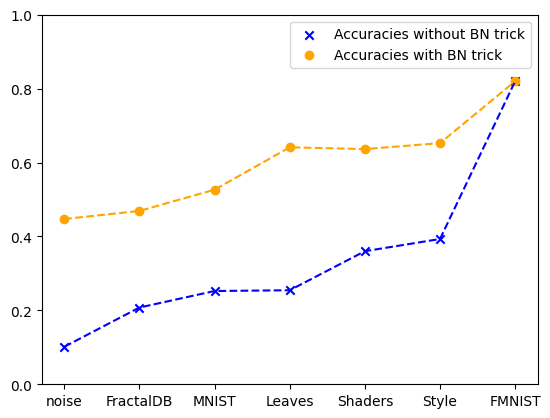

In [20]:
data = list(fmnist_data_wo.keys())
acc_wo = [val[2] for val in fmnist_data_wo.values()]
acc_with =  [val[2] for val in fmnist_data_with.values()]



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("results/comparison_on_FMNIST.png")
svhn_data_wo = {}
svhn_data_with = {}

In [21]:
precision_values = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
recall_values = [[0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589, 0.5589223568942757, 0.5590453517914657, 0.5590453517914657, 0.5593586741127725, 0.5605367673606932, 0.5605367673606932, 0.5632142209323417, 0.5632142209323417, 0.5683574682720468, 0.5766135688345989, 0.5766135688345989, 0.588699993680086, 0.603068755664897, 0.603068755664897, 0.6182522123893806, 0.63371657935914, 0.63371657935914, 0.6470996873914554, 0.6595468491857446, 0.6595468491857446, 0.6704493654182961, 0.6704493654182961, 0.6802911534154535, 0.6896424076404827, 0.6896424076404827, 0.6983107601579289, 0.7079522711727003, 0.7079522711727003, 0.7173293631439792, 0.726183670287407, 0.726183670287407, 0.7354140898444695, 0.7354140898444695, 0.7442473633748802, 0.752666451195863, 0.752666451195863, 0.7624621429156094, 0.7714498674911661, 0.7714498674911661, 0.7805647886930532, 0.7895629079196451, 0.7895629079196451, 0.7987709018150636, 0.8086405463279125, 0.8086405463279125, 0.8194293757147465, 0.8194293757147465, 0.829425382880209, 0.8411088369853118, 0.8411088369853118, 0.8532303370786517, 0.8674799776494692, 0.8674799776494692, 0.8862425472535836, 0.9172821270310192, 0.9172821270310192, 1.0, 1.0], [0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.00312, 0.003120062401248025, 0.003120062401248025, 0.0031201248049922, 0.003120374444933392, 0.003120374444933392, 0.0031209362808842654, 0.003122497998398719, 0.003122497998398719, 0.003126377810733897, 0.003133914580738479, 0.003133914580738479, 0.0031468108282567474, 0.003170602821023536, 0.003170602821023536, 0.003215566640557365, 0.003215566640557365, 0.0032900980702309395, 0.0034091654100832625, 0.0034091654100832625, 0.003592400690846287, 0.0038532789922193405, 0.0038532789922193405, 0.004242819843342037, 0.004812883719495264, 0.004812883719495264, 0.005603247009805682, 0.005603247009805682, 0.006759098786828423, 0.008402456102553054, 0.008402456102553054, 0.010651372388365424, 0.013850661457870905, 0.013850661457870905, 0.01823921431076815, 0.02393005062126093, 0.02393005062126093, 0.030285381479324403, 0.03669724770642202, 0.03669724770642202, 0.042368278109722976, 0.042368278109722976, 0.04662283323371189, 0.04949238578680203, 0.04949238578680203, 0.05170699370235333, 0.05313351498637602, 0.05313351498637602, 0.054679284963196635, 0.056195965417867436, 0.056195965417867436, 0.05775638652350981, 0.05775638652350981, 0.059861857252494245, 0.06190476190476191, 0.06190476190476191, 0.06393442622950819, 0.06675224646983312, 0.06675224646983312, 0.0695807314897413, 0.07348092322185587, 0.07348092322185587, 0.07878787878787878, 0.08533916849015317, 0.08533916849015317, 0.09454545454545454, 0.09454545454545454, 0.10512129380053908, 0.12111801242236025, 0.12111801242236025, 0.14391143911439114, 0.18266978922716628, 0.18266978922716628, 0.25573770491803277, 0.4, 0.4, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132, 0.3132062641252825, 0.3132313231323132, 0.3132313231323132, 0.3132375885106213, 0.3132877205617573, 0.3132877205617573, 0.31348840933658967, 0.31394090052523954, 0.31394090052523954, 0.3146284129949973, 0.315923258488168, 0.315923258488168, 0.31806641616736064, 0.31806641616736064, 0.32185136468267017, 0.3275739446931348, 0.3275739446931348, 0.33540372670807456, 0.34610794324360167, 0.34610794324360167, 0.36019873033397737, 0.3794891678379295, 0.3794891678379295, 0.400665216835103, 0.400665216835103, 0.42718022859325133, 0.45851144814663, 0.45851144814663, 0.4916488760517393, 0.5250276595031348, 0.5250276595031348, 0.557354877744955, 0.5862753172850137, 0.5862753172850137, 0.6102883865939205, 0.6299275945293644, 0.6299275945293644, 0.64561345646438, 0.64561345646438, 0.6581214540869931, 0.669316579048596, 0.669316579048596, 0.6800416883793643, 0.6892302275428018, 0.6892302275428018, 0.6987951807228916, 0.7086293497443323, 0.7086293497443323, 0.7177230853842981, 0.7177230853842981, 0.7271545319465081, 0.7370105421686747, 0.7370105421686747, 0.7463184482676453, 0.755937439660166, 0.755937439660166, 0.7652462861610634, 0.7739830969208719, 0.7739830969208719, 0.7844512347843511, 0.7951256664127951, 0.7951256664127951, 0.8040665434380776, 0.8040665434380776, 0.8145220014563612, 0.8260800759613863, 0.8260800759613863, 0.838150289017341, 0.8531735222010352, 0.8531735222010352, 0.8722776137692865, 0.9025936599423631, 0.9025936599423631, 1.0, 1.0]]


In [22]:
import matplotlib.pyplot as plt

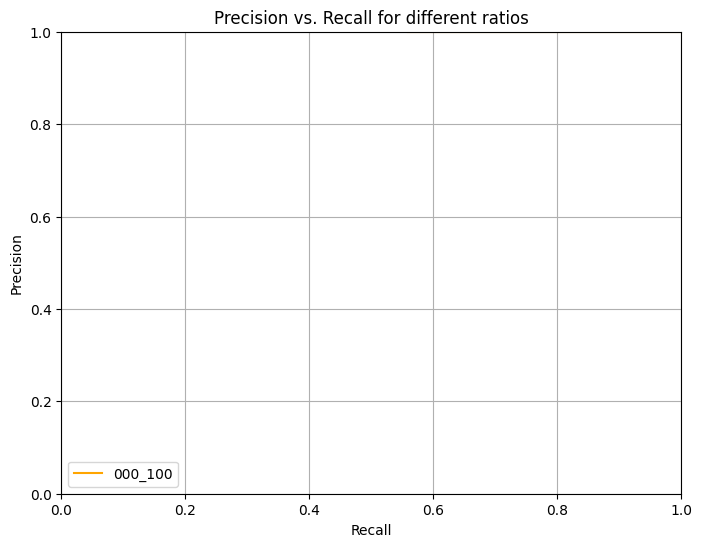

In [23]:

plt.figure(figsize=(8, 6))

# Colors and labels
colors = ["orange", "green", "blue", "red"]
ratios = ["000_100", "100_000", "090_010", "050_050"]

# Plot for each data directory
for i, text in enumerate(range(1)):
    if len(precision_values[i]) > 0 and len(recall_values[i]) > 0:
        plt.plot(recall_values[i], precision_values[i], color=colors[i], label=f"{ratios[i]}")
    else:
        print(f"Warning: No valid precision-recall data for {ratios[i]}")

# Formatting the plot
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall for different ratios")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()



In [ ]:
CIFAR10_SSL_accuracies_wo = {}

CIFAR10_SSL_accuracies_wo["noise_CIFAR10"] = [[0.1113, 0.1114, 0.1048], [0.1064, 0.1298, 0.1109], [0.1170, 0.1131, 0.1201]]
CIFAR10_SSL_accuracies_wo["dead_leaves"] = [[0.1988, 0.1768, 0.2138], [0.2746, 0.2703, 0.2631], [0.2917, 0.2924, 0.2882]]
CIFAR10_SSL_accuracies_wo["stylegan"] = [[0.1382, 0.1317, 0.1355], [0.1844, 0.1866, 0.1878], [0.2056, 0.2085, 0.2089]]
CIFAR10_SSL_accuracies_wo["Shaders21k"] = [[0.2172, 0.2179, 0.2393], [0.2543, 0.2536, 0.2430], [0.2779, 0.2769]]
CIFAR10_SSL_accuracies_wo["CIFAR10"] = [[0.4003, 0.4031, 0.4165], [0.4613, 0.4627, 0.4608], [0.4616, 0.4619, 0.4633]]

CIFAR10_SSL_accuracies_with = {}
CIFAR10_SSL_accuracies_with["noise_CIFAR10"] = [[0.4014, 0.4142, 0.4138], [0.4567, 0.4435, 0.4583], [0.4891, 0.4794, 0.4824]]
CIFAR10_SSL_accuracies_with["dead_leaves"] = [[0.3781, 0.3770, 0.3740], [0.4215, 0.4386, 0.4263], [0.4627, 0.4702, 0.4778]]
CIFAR10_SSL_accuracies_with["stylegan"] = [[0.3963, 0.4087, 0.4114], [0.4388, 0.4357, 0.4336], [0.4760, 0.4730]]
CIFAR10_SSL_accuracies_with["Shaders21k"] = [[0.3925, 0.4011, 0.3849], [0.4446, 0.4411], [0.4786, 0.4802, 0.4796]]
CIFAR10_SSL_accuracies_with["CIFAR10"] = [[0.4415, 0.4522, 0.4410], [0.4862, 0.4856, 0.4770], [0.4938, 0.4910, 0.4915]]

CIFAR10_num_answered_with = {'noise_CIFAR10': [[462, 484, 470], [1506, 1483, 1498], [4264, 4524, 4388]], 'dead_leaves_CIFAR10': [[467, 476, 454], [1540, 1550, 1504], [4512, 4583, 4571]], 'stylegan_CIFAR10': [[502, 456, 483], [1522, 1547, 1544], [4592, 4609, 4652]], 'Shaders21k_CIFAR10': [[475, 469, 448], [1537, 1505, 1529], [4560, 4583, 4500]], 'CIFAR10': [[583, 560, 590], [1846, 1868, 1847], [4039, 3981, 3169]]}


